In [0]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [18]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans = ['airplane', 'automobile', 'bird',
         'cat', 'deer', 'dog', 'frog',
         'horse', 'ship', 'truck']

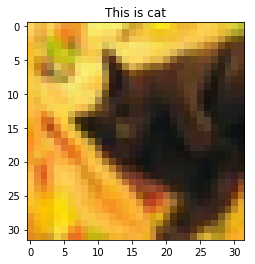

In [20]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
plt.title('This is ' + trans[y_train[c][0]])
plt.imshow(x_train[c])

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
cnn =Sequential()
# 1792: 3(filter寬) * 3(filter高) * 3(像素RGB通道) * 64(個) + 64(bias)
cnn.add(Conv2D(filters = 64, 
               kernel_size = (3, 3), 
               padding='same', 
               activation='relu', 
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D())

# 73856: 3(filter寬) * 3(filter高) * 64(前一層filters) * 128(個) + 128(bias)
cnn.add(Conv2D(filters = 128, 
               kernel_size = (3, 3), 
               padding='same', 
               activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(filters = 256, 
               kernel_size = (3, 3), 
               padding='same', 
               activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dropout(rate=0.25))

cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(rate=0.25))

cnn.add(Dense(10, activation='softmax'))
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)             

In [0]:
# 資料預處理
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [23]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print('原本', y_train[0])
print('後來', y_train_cat[0])

原本 [6]
後來 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
cnn.compile(loss='categorical_crossentropy', 
           optimizer='adam', 
           metrics=['accuracy'])

In [25]:
cnn.fit(x_train_norm, y_train_cat, 
        batch_size=200,
        epochs=10,
        validation_split=0.1,
        verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 10s - loss: 1.5968 - acc: 0.4190 - val_loss: 1.2283 - val_acc: 0.5716
Epoch 2/10
 - 9s - loss: 1.1348 - acc: 0.5966 - val_loss: 1.0074 - val_acc: 0.6402
Epoch 3/10
 - 9s - loss: 0.9423 - acc: 0.6676 - val_loss: 0.8396 - val_acc: 0.7152
Epoch 4/10
 - 9s - loss: 0.8098 - acc: 0.7172 - val_loss: 0.7683 - val_acc: 0.7396
Epoch 5/10
 - 9s - loss: 0.7180 - acc: 0.7482 - val_loss: 0.7352 - val_acc: 0.7454
Epoch 6/10
 - 9s - loss: 0.6356 - acc: 0.7773 - val_loss: 0.6872 - val_acc: 0.7684
Epoch 7/10
 - 9s - loss: 0.5708 - acc: 0.8007 - val_loss: 0.6894 - val_acc: 0.7594
Epoch 8/10
 - 10s - loss: 0.5044 - acc: 0.8223 - val_loss: 0.6512 - val_acc: 0.7816
Epoch 9/10
 - 9s - loss: 0.4445 - acc: 0.8435 - val_loss: 0.6433 - val_acc: 0.7882
Epoch 10/10
 - 10s - loss: 0.4044 - acc: 0.8582 - val_loss: 0.6294 - val_acc: 0.7948


In [26]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 2s 151us/step


[0.6728724229812622, 0.7761]

In [28]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = cnn.predict_classes(x_test_norm)
pd.DataFrame(confusion_matrix(y_test, pre), 
             columns=['(預測)'+str(i) for i in trans], 
             index=['(真實)'+str(i) for i in trans])

,(預測)airplane,(預測)automobile,(預測)bird,(預測)cat,(預測)deer,(預測)dog,(預測)frog,(預測)horse,(預測)ship,(預測)truck
(真實)airplane,790,18,42,15,25,4,4,5,61,36
(真實)automobile,5,895,4,11,5,2,3,2,22,51
(真實)bird,37,5,711,43,98,39,31,16,13,7
(真實)cat,17,1,71,618,91,119,34,17,19,13
(真實)deer,14,3,47,46,809,20,16,38,7,0
(真實)dog,10,2,42,173,58,651,13,29,13,9
(真實)frog,3,7,54,66,50,21,781,2,12,4
(真實)horse,13,1,30,38,76,49,2,779,5,7
(真實)ship,25,15,16,10,7,5,2,0,904,16
(真實)truck,19,82,6,16,8,5,3,10,28,823


In [29]:
y_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [34]:
false_answer

array([6, 7, 5, 2, 4, 5, 2, 1, 6, 0, 7, 4, 6, 3, 0, 9, 5, 7, 6, 3, 0, 5,
       9, 6, 3, 7, 2, 5, 2, 8, 5, 9, 3, 4, 0, 2, 7, 4, 9, 7, 6, 4, 3, 6,
       7, 6, 0, 3, 9, 4, 0, 5, 7, 2, 5, 3, 3, 0, 0, 9, 4, 8, 6, 8, 5, 3,
       4, 3, 5, 7, 3, 3, 8, 0, 0, 9, 2, 2, 2, 2, 3, 3, 3, 0, 0, 2, 7, 3,
       4, 5, 2, 3, 3, 5, 6, 4, 0, 5, 0, 5, 5, 9, 5, 9, 5, 0, 0, 9, 9, 0,
       7, 5, 5, 2, 3, 7, 9, 5, 9, 2, 2, 5, 0, 4, 5, 6, 2, 4, 6, 8, 1, 3,
       3, 6, 0, 3, 1, 0, 5, 9, 6, 3, 8, 4, 2, 3, 9, 4, 2, 9, 5, 2, 6, 6,
       7, 0, 6, 1, 5, 0, 3, 4, 1, 2, 4, 7, 5, 3, 0, 5, 6, 0, 7, 5, 1, 3,
       7, 9, 3, 3, 0, 0, 6, 3, 2, 5, 0, 3, 9, 5, 6, 0, 2, 9, 9, 1, 3, 3,
       1, 0])

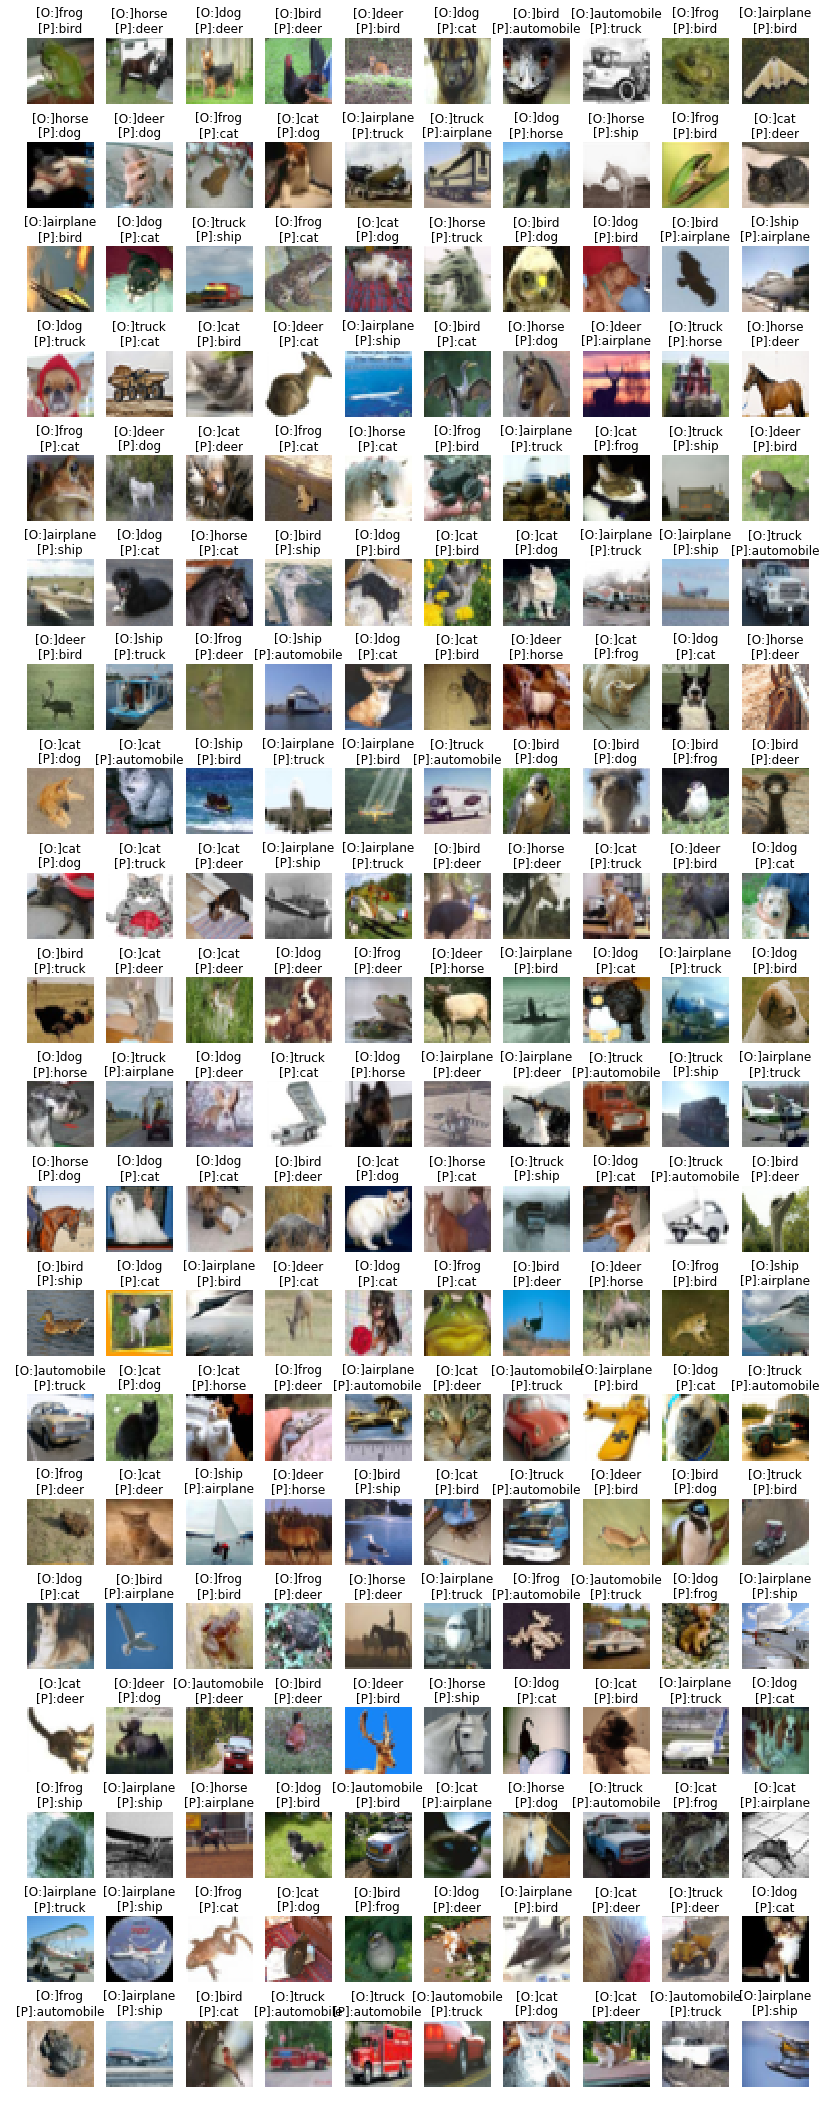

In [35]:
import numpy as np
idx = np.nonzero(pre != y_test.reshape(-1))[0][:200]
# 預測錯誤的圖片
false_img = x_test[idx]
# 預測錯誤圖片的正確答案
false_answer = y_test.reshape(-1)[idx]
# 預測錯誤圖片的預測標籤
false_pre = pre[idx]

width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 40))
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    t = "[O:]" + trans[false_answer[i]] + "\n[P]:" + trans[false_pre[i]]
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

In [0]:
cnn.save('cnn.h5')

In [37]:
from keras.models import load_model
# 讀取回來: 直接繼續訓練(fit) 預測(predict)
load = load_model('cnn.h5')
cnn.evaluate(x_test_norm, y_test_cat)
# 如果你想看儲存的東西長啥樣:
# https://support.hdfgroup.org/products/java/release/download.html

10000/10000 [==============================] - 2s 187us/step


[0.6728724229812622, 0.7761]